In [1]:
import import_ipynb  
import utils         
import pandas as pd
import plotly.express as px
from scipy.stats import ttest_ind

In [2]:
years = [2017,2018,2019,2020,2021,2022,2023,2024,2025]
philly_crime_all = utils.load_philly_crime_data(years)

In [3]:
#stadium Coordinates
lincoln_field = (-75.1675, 39.9008)

#preprocess data
philly_processed = utils.preprocess_crime_data(
    philly_crime_all,
    stadium_coords=lincoln_field,
    date_col="dispatch_date_time"
)

#Load eagles games, filter to home games
eagles_games_all = utils.load_all_eagles_games()
home_games = eagles_games_all[eagles_games_all["Location"] == "Home"].copy()
home_games["date"] = pd.to_datetime(home_games["date"]).dt.normalize()


#Tag games days in the crime data
philly_tagged = utils.tag_game_windows(
    df=philly_processed,
    games_df=home_games,
    team_name="Eagles"
).copy()

philly_tagged["date"] = pd.to_datetime(philly_tagged["date"]).dt.normalize()

#Merge game result into tagged data
game_results = home_games[["date", "Result"]].copy()
philly_tagged = philly_tagged.merge(game_results, on="date", how="left")

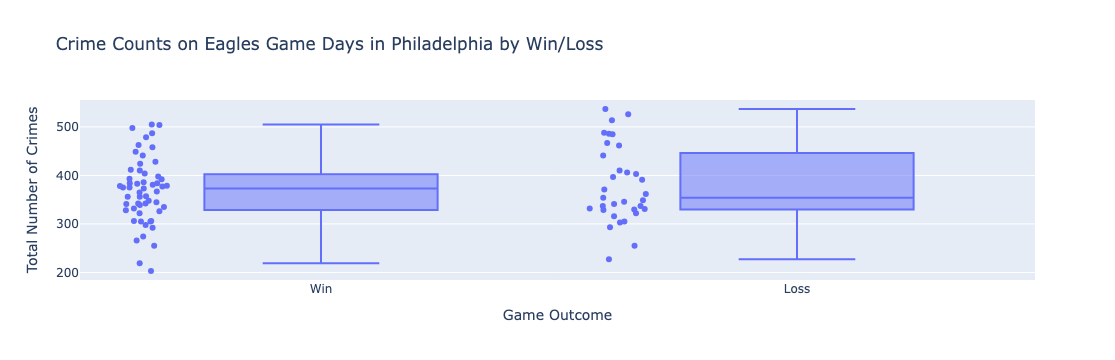

Welch's t-test (Win vs Loss): t=-0.74, p=0.4636


In [4]:
game_day_crimes = philly_tagged[
    (philly_tagged["is_game_window"]) &
    (philly_tagged["Result"].isin(["Win", "Loss"]))
]

crime_counts = (
    game_day_crimes.groupby(["date", "Result"])
    .size()
    .reset_index(name="crime_count")
)

utils.plot_game_day_crime_boxplot(
    crime_counts,
    result_col="Result",
    title="Crime Counts on Eagles Game Days in Philadelphia by Win/Loss",
    save_path="output/figures/eagles_game_day_boxplot.png"
)

t_stat, p_val = utils.welchs_t_test_by_result(
    crime_counts,
    result_col="Result",
    group1="Win",
    group2="Loss"
)


In [5]:
#Filter to crimes within 3 km
philly_tagged = philly_tagged[philly_tagged["distance_to_stadium_m"] <= 3_000]

game_day_crimes = philly_tagged[
    (philly_tagged["is_game_window"]) &
    (philly_tagged["Result"].isin(["Win", "Loss"]))
]

crime_counts = (
    game_day_crimes.groupby(["date", "Result"])
    .size()
    .reset_index(name="crime_count")
)

utils.plot_game_day_crime_boxplot(
    crime_counts,
    result_col="Result",
    title="Crime Counts on Eagles Game Days Within 3km of the Stadium by Win/Loss",
    save_path="output/figures/eagles_game_day_3km_boxplot.png"
)

t_stat, p_val = utils.welchs_t_test_by_result(
    crime_counts,
    result_col="Result",
    group1="Win",
    group2="Loss"
)


Welch's t-test (Win vs Loss): t=2.70, p=0.0085
